# Energy_landscape_comparison

# Load some useful  functions

In [7]:
from SBL.SBL_pytools import SBL_pytools as sblpyt
help(sblpyt)

from SBL.TG_weights_from_normalized_boltzmann import *

from SBL.TG_builders import *

from SBL.EMD_comparators import *

from SBL.EL_comparators import *

Help on class SBL_pytools in module SBL_pytools:

class SBL_pytools(builtins.object)
 |  Static methods defined here:
 |  
 |  convert_eps_to_png(ifname, osize)
 |  
 |  convert_pdf_to_png(ifname, osize)
 |  
 |  find_and_convert(suffix, odir, osize)
 |      # find file with suffix, convert, and return image file
 |  
 |  find_and_show_images(suffix, odir, osize)
 |  
 |  find_file_in_output_directory(suffix, odir)
 |  
 |  show_eps_file(eps_file, osize)
 |  
 |  show_image(img)
 |  
 |  show_log_file(odir)
 |  
 |  show_pdf_file(pdf_file)
 |  
 |  show_row_n_images(images, size)
 |  
 |  show_text_file(file_suffix, odir)
 |  
 |  show_this_text_file(txt_file)
 |  
 |  show_txt_file(file_suffix, odir)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



# Main options to compare two landscapes

The main options of the <b>compare</b> method in the next cells are:

 - <em>transGraph1</em>: first transition graph XML archive
 - <em>transGraph2</em>: second transition graph XML archive
 - <em> lp_solver</em>: the linear problem solver for the Earth Mover Distance; options currently supported in the sBL  are lp_solve or clp (coin_or_clp)
 - <em>symmetric</em>: moving also from target to source
 - <em>connectivityConstraints</em>:  run Earth Mover Distance with connectivity constraints

In [8]:
def cmp_landscapes(sbl_exe_name, tg1, tg2, lp_solver, symmetric, connectivityConstraints, plot_tp=False):
    odir = EL_comparators.compare(sbl_exe_name, tg1, tg2, lp_solver, symmetric, connectivityConstraints)

    EMD_comparators.scatter_plot_unit_cost_flow_DB(odir, "emd_engine.xml")
    if symmetric:
        EMD_comparators.scatter_plot_unit_cost_flow_DB(odir, "emd_engine_symmetric.xml")

    if (plot_tp):
        EMD_comparators.plot_transportation_plan(odir, "transportation_plan.dot")
        if symmetric:
            EMD_comparators.plot_transportation_plan(odir, "transportation_plan_symmetric.dot")
       

# Example 1: as a toy system, we first process himmelblau, a 2D terrain

## First: comparison with the   earth mover distance

* Run the calculation
* Plot the  flows dthat circulate on selected priviledged edges
* Plot the transporation plan.



Using executable /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-energy-landscape-comparison-euclid.exe

Executing /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-energy-landscape-comparison-euclid.exe --transition-graph data/himmelbleau_tg.xml --transition-graph data/himmelbleau_transition_graph_noisy.xml --directory tmp-results-sym-True-cc-False  -o --log  --symmetric-mode  --lp-solver clp
All output files in tmp-results-sym-True-cc-False: ['sbl-energy-landscape-comparison-euclid__f_himmelbleau_tg__f_himmelbleau_transition_graph_noisy__symmetric_mode__emd_engine_symmetric.xml\n', 'sbl-energy-landscape-comparison-euclid__f_himmelbleau_tg__f_himmelbleau_transition_graph_noisy__symmetric_mode__emd_engine.xml\n', 'sbl-energy-landscape-comparison-euclid__f_himmelbleau_tg__f_himmelbleau_transition_graph_noisy__symmetric_mode__log.txt\n', 'sbl-energy-landscape-comparison-euclid__f_himmelbleau_tg__f_himmelbleau_transition_graph_noisy__symmetric_mode__transportation_plan.d

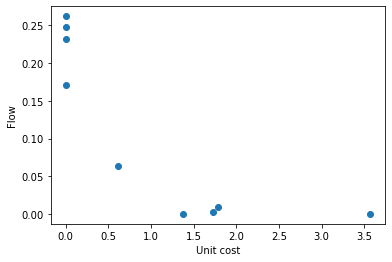

XML: 1 / 1 files were loaded

EMD_comparators: summary
Total cost: 0.06592567557788104
Total flow: 0.9897999788518064
Normalized cost: 0.06660504848096332


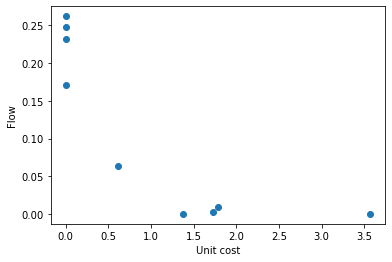

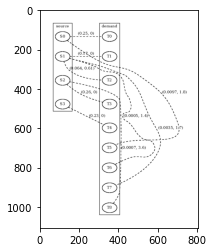

In [15]:
sbl_exe_name = "sbl-energy-landscape-comparison-euclid.exe"

tg1 = "data/himmelbleau_tg.xml"
tg2 = "data/himmelbleau_transition_graph_noisy.xml"

lp_solver = "clp"
symmetric = True
connectivityConstraints = False

cmp_landscapes(sbl_exe_name, tg1, tg2, lp_solver, symmetric, connectivityConstraints, True)


## Second, let us use connectivity constraints
* Note that is this case, the transportation plan matches that observed for the plain EMD

Using executable /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-energy-landscape-comparison-euclid.exe

Executing /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-energy-landscape-comparison-euclid.exe --transition-graph data/himmelbleau_tg.xml --transition-graph data/himmelbleau_transition_graph_noisy.xml --directory tmp-results-sym-True-cc-True  -o --log  --symmetric-mode  --with-connectivity-constraints 
All output files in tmp-results-sym-True-cc-True: ['sbl-energy-landscape-comparison-euclid__f_himmelbleau_tg__f_himmelbleau_transition_graph_noisy__with_cc_constraints__algo_reg__edge_selection_min-cost__recursion_refined__symmetric_mode__emd_engine_symmetric.xml\n', 'sbl-energy-landscape-comparison-euclid__f_himmelbleau_tg__f_himmelbleau_transition_graph_noisy__with_cc_constraints__algo_reg__edge_selection_min-cost__recursion_refined__symmetric_mode__emd_engine.xml\n', 'sbl-energy-landscape-comparison-euclid__f_himmelbleau_tg__f_himmelbleau_transition_graph_nois

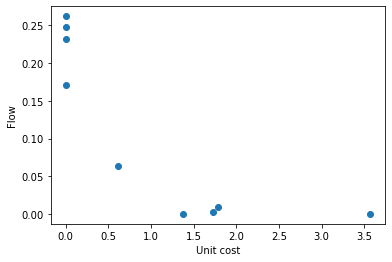

XML: 1 / 1 files were loaded

EMD_comparators: summary
Total cost: 0.06592567189222925
Total flow: 0.9897999999999999
Normalized cost: 0.06660504333423849


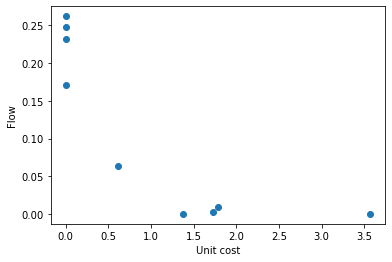

In [10]:
sbl_exe_name = "sbl-energy-landscape-comparison-euclid.exe"

tg1 = "data/himmelbleau_tg.xml"
tg2 = "data/himmelbleau_transition_graph_noisy.xml"


lp_solver = None # since EMD is used
symmetric = True
connectivityConstraints = True

cmp_landscapes(sbl_exe_name, tg1, tg2, lp_solver, symmetric, connectivityConstraints, False)


# Example 2: BLN69

## First, let us build the transition graphs using local minima and their connexions across saddle points

In [14]:
from SBL.TG_builders import *

tg1 = TG_builders.build_transition_graph_fromDB("lrmsd", 
                                    "data/bln69_database_minima_conformations_1.txt",\
                                    "data/bln69_database_minima_energies_1.txt",\
                                    "data/bln69_database_transitions_conformations_1.txt",\
                                    "data/bln69_database_transitions_energies_1.txt",\
                                    "data/bln69_database_transitions_1.txt",\
                                    "tmp-results-tg-1",\
                                    "data/bln69_database_minima_weights_1.txt")
print(tg1)
tg2 = TG_builders.build_transition_graph_fromDB("lrmsd", 
                                                "data/bln69_database_minima_conformations_2.txt",\
                                    "data/bln69_database_minima_energies_2.txt",\
                                    "data/bln69_database_transitions_conformations_2.txt",\
                                    "data/bln69_database_transitions_energies_2.txt",\
                                    "data/bln69_database_transitions_2.txt",\
                                     "tmp-results-tg-2",\
                                    "data/bln69_database_minima_weights_2.txt")
print(tg2)

Executing sbl-tg-builder-lrmsd.exe --from-DB --samples-to-mins data/bln69_database_transitions_1.txt                 --points-file data/bln69_database_minima_conformations_1.txt --energies data/bln69_database_minima_energies_1.txt --points-file data/bln69_database_transitions_conformations_1.txt --energies data/bln69_database_transitions_energies_1.txt                 --directory tmp-results-tg-1 --verbose --log --discard-loops --weights data/bln69_database_minima_weights_1.txt

tmp-results-tg-1/sbl-tg-builder-lrmsd__tg.xml
Executing sbl-tg-builder-lrmsd.exe --from-DB --samples-to-mins data/bln69_database_transitions_2.txt                 --points-file data/bln69_database_minima_conformations_2.txt --energies data/bln69_database_minima_energies_2.txt --points-file data/bln69_database_transitions_conformations_2.txt --energies data/bln69_database_transitions_energies_2.txt                 --directory tmp-results-tg-2 --verbose --log --discard-loops --weights data/bln69_database_minima_w

## The following function will be used to explore various setups

## First comparison: using the earth mover distance.  Given that the sum of weights are identical, the transport plan retrieved is symmetric.

Using executable /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-energy-landscape-comparison-lrmsd.exe

Executing /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-energy-landscape-comparison-lrmsd.exe --transition-graph tmp-results-tg-1/sbl-tg-builder-lrmsd__tg.xml --transition-graph tmp-results-tg-2/sbl-tg-builder-lrmsd__tg.xml --directory tmp-results-sym-True-cc-False  -o --log  --symmetric-mode  --lp-solver clp
All output files in tmp-results-sym-True-cc-False: ['sbl-energy-landscape-comparison-lrmsd__f_sbl-tg-builder-lrmsd__tg__f_sbl-tg-builder-lrmsd__tg__symmetric_mode__emd_engine_symmetric.xml\n', 'sbl-energy-landscape-comparison-lrmsd__f_sbl-tg-builder-lrmsd__tg__f_sbl-tg-builder-lrmsd__tg__symmetric_mode__emd_engine.xml\n', 'sbl-energy-landscape-comparison-lrmsd__f_sbl-tg-builder-lrmsd__tg__f_sbl-tg-builder-lrmsd__tg__symmetric_mode__log.txt\n', 'sbl-energy-landscape-comparison-lrmsd__f_sbl-tg-builder-lrmsd__tg__f_sbl-tg-builder-lrmsd__tg__symmetric_mode__tra

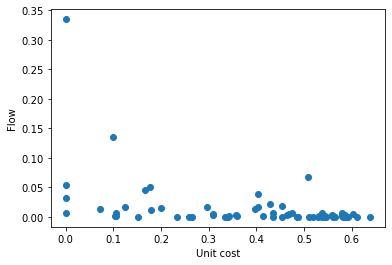

XML: 1 / 1 files were loaded

EMD_comparators: summary
Total cost: 0.16262044557915595
Total flow: 0.9988699983950937
Normalized cost: 0.16280441482919877


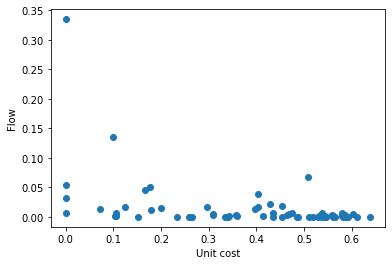

In [12]:
sbl_exe_name = "sbl-energy-landscape-comparison-lrmsd.exe"
tg1 = "tmp-results-tg-1/sbl-tg-builder-lrmsd__tg.xml"
tg2 = "tmp-results-tg-2/sbl-tg-builder-lrmsd__tg.xml"

lp_solver = "clp"
symmetric = True
connectivityConstraints = False

cmp_landscapes(sbl_exe_name, tg1, tg2, lp_solver, symmetric, connectivityConstraints, False)


## Second: comparison with connectivity constraints. Note the following:
* the transportation plan is not symmetric anymore.
* connectivity constraints prevent the full satisfaction -- the total flow obtained is strictly less than the maximum total flow.

Using executable /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-energy-landscape-comparison-lrmsd.exe

Executing /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-energy-landscape-comparison-lrmsd.exe --transition-graph tmp-results-tg-1/sbl-tg-builder-lrmsd__tg.xml --transition-graph tmp-results-tg-2/sbl-tg-builder-lrmsd__tg.xml --directory tmp-results-sym-True-cc-True  -o --log  --symmetric-mode  --with-connectivity-constraints 
All output files in tmp-results-sym-True-cc-True: ['sbl-energy-landscape-comparison-lrmsd__f_sbl-tg-builder-lrmsd__tg__f_sbl-tg-builder-lrmsd__tg__with_cc_constraints__algo_reg__edge_selection_min-cost__recursion_refined__symmetric_mode__emd_engine_symmetric.xml\n', 'sbl-energy-landscape-comparison-lrmsd__f_sbl-tg-builder-lrmsd__tg__f_sbl-tg-builder-lrmsd__tg__with_cc_constraints__algo_reg__edge_selection_min-cost__recursion_refined__symmetric_mode__emd_engine.xml\n', 'sbl-energy-landscape-comparison-lrmsd__f_sbl-tg-builder-lrmsd__tg__f_sbl-

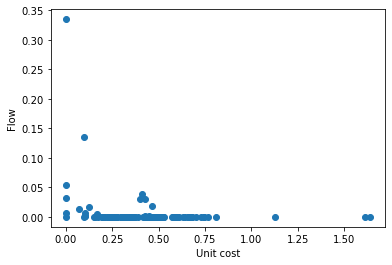

XML: 1 / 1 files were loaded

EMD_comparators: summary
Total cost: 0.04339595777657565
Total flow: 0.6995052012572126
Normalized cost: 0.06203807734178473


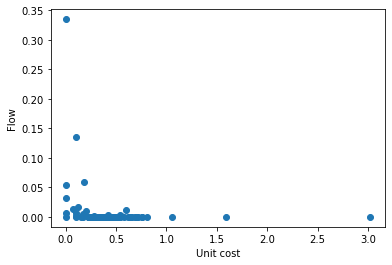

In [13]:
#cmp_bln(lp_solver=None, symmetric=True, connectivityConstraints=True)
sbl_exe_name = "sbl-energy-landscape-comparison-lrmsd.exe"
tg1 = "tmp-results-tg-1/sbl-tg-builder-lrmsd__tg.xml"
tg2 = "tmp-results-tg-2/sbl-tg-builder-lrmsd__tg.xml"

lp_solver = None
symmetric = True
connectivityConstraints = True

cmp_landscapes(sbl_exe_name, tg1, tg2, lp_solver, symmetric, connectivityConstraints, False)
